In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol.csv',index_col = 0)
df_orig= df.copy()
df_orig

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
ndarray = [3,2,4,1, 1]
colname = ['three', 'two', 'four', 'one', 'one2']
def get_sorted(ndarray, colname):

    ndarray, colname = zip(*sorted(zip(ndarray, colname)))

    return ndarray, colname
a, b = get_sorted(ndarray,colname)
a

(1, 1, 2, 3, 4)

In [5]:
X_cols_orig = df.iloc[:,:-1].columns.to_list()
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()


In [7]:
X = df.iloc[:,0].to_numpy()
X


array([0.45205479, 0.28767123, 0.49315068, ..., 0.56164384, 0.06849315,
       0.47945205])

importance: [2.87145777]
importance: (2.8714577697341612,)
X_cols: ('age',)
Feature: 0, Score: 2.87146


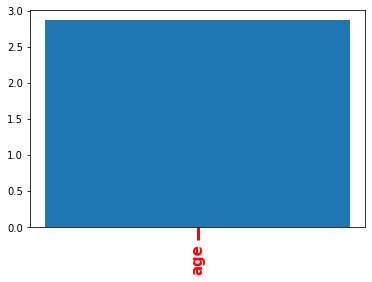

In [10]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# for col_num in range(df_orig.shape[1]):
col_num = 0
X = df.iloc[:,col_num].to_numpy().reshape(-1,1)

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
print("importance:",importance)
importance, X_cols = get_sorted(importance, X_cols_orig)

print("importance:",importance)
print("X_cols:",X_cols)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar(X_cols, importance)
pyplot.xticks(X_cols, X_cols, color='orange', rotation=90, fontweight='bold', fontsize='15')
pyplot.tick_params(axis='x', colors='red', direction='out', length=13, width=3)



pyplot.show()

# Orig

importance: [ 2.13400566e+00 -5.81795533e-01  5.42528500e+00  4.35830462e+00
  2.87980731e+00  2.16213583e+00 -1.42900715e-02  7.97805022e-03
 -2.42931466e-01  8.47777445e-03 -9.94335626e-02  8.93337815e-02
  1.11413284e+00  1.86141496e-03]
importance: (-0.5817955330465643, -0.24293146617773975, -0.09943356261821, -0.014290071460475218, 0.0018614149555988867, 0.007978050218994906, 0.008477774451979003, 0.08933378146027328, 1.1141328398162198, 2.1340056625177297, 2.162135825877683, 2.87980730564406, 4.358304624890926, 5.425285001099224)
X_cols: ('fnlwgt', 'marital-status', 'relationship', 'workclass', 'native-country', 'education', 'occupation', 'race', 'sex', 'age', 'hours-per-week', 'capital-loss', 'capital-gain', 'education-num')
Feature: 0, Score: -0.58180
Feature: 1, Score: -0.24293
Feature: 2, Score: -0.09943
Feature: 3, Score: -0.01429
Feature: 4, Score: 0.00186
Feature: 5, Score: 0.00798
Feature: 6, Score: 0.00848
Feature: 7, Score: 0.08933
Feature: 8, Score: 1.11413
Feature: 9,

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


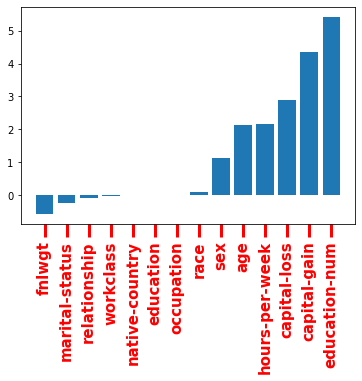

In [6]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
print("importance:",importance)
importance, X_cols = get_sorted(importance, X_cols_orig)

print("importance:",importance)
print("X_cols:",X_cols)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar(X_cols, importance)
pyplot.xticks(X_cols, X_cols, color='orange', rotation=90, fontweight='bold', fontsize='15')
pyplot.tick_params(axis='x', colors='red', direction='out', length=13, width=3)



pyplot.show()

# CART Feature importance

Feature: 0, Score: 0.00411
Feature: 1, Score: 0.00667
Feature: 2, Score: 0.01108
Feature: 3, Score: 0.01206
Feature: 4, Score: 0.01461
Feature: 5, Score: 0.03587
Feature: 6, Score: 0.03751
Feature: 7, Score: 0.05885
Feature: 8, Score: 0.07267
Feature: 9, Score: 0.11540
Feature: 10, Score: 0.11546
Feature: 11, Score: 0.11558
Feature: 12, Score: 0.19903
Feature: 13, Score: 0.20109


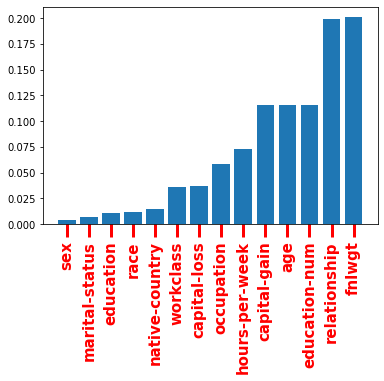

In [69]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# importance = np.sort(importance)
importance, X_cols = get_sorted(importance, X_cols_orig)

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar(X_cols, importance)
pyplot.xticks(X_cols, X_cols, color='orange', rotation=90, fontweight='bold', fontsize='15')
pyplot.tick_params(axis='x', colors='red', direction='out', length=13, width=3)

pyplot.show()

# Random Forest Classification Feature Importance

Feature: 0, Score: 0.01214
Feature: 1, Score: 0.01373
Feature: 2, Score: 0.01686
Feature: 3, Score: 0.03290
Feature: 4, Score: 0.03530
Feature: 5, Score: 0.03877
Feature: 6, Score: 0.06788
Feature: 7, Score: 0.06840
Feature: 8, Score: 0.08248
Feature: 9, Score: 0.09211
Feature: 10, Score: 0.10872
Feature: 11, Score: 0.11285
Feature: 12, Score: 0.14512
Feature: 13, Score: 0.17274


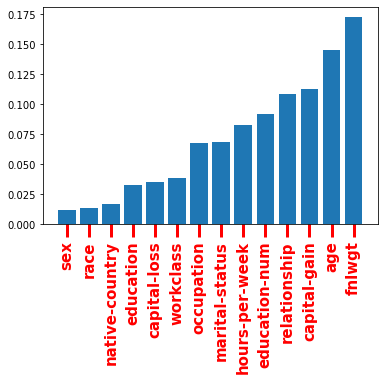

In [70]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
importance, X_cols = get_sorted(importance, X_cols_orig)

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
def get_plot(importance):
    # plot feature importance
    pyplot.bar(X_cols, importance)
    pyplot.xticks(X_cols, X_cols, color='orange', rotation=90, fontweight='bold', fontsize='15')
    pyplot.tick_params(axis='x', colors='red', direction='out', length=13, width=3)

    pyplot.show()
    
get_plot(importance)

# XGBoost Classification Feature Importance

Feature: 0, Score: 0.01038
Feature: 1, Score: 0.01242
Feature: 2, Score: 0.01369
Feature: 3, Score: 0.01497
Feature: 4, Score: 0.01651
Feature: 5, Score: 0.02604
Feature: 6, Score: 0.02802
Feature: 7, Score: 0.02855
Feature: 8, Score: 0.03198
Feature: 9, Score: 0.05694
Feature: 10, Score: 0.10289
Feature: 11, Score: 0.12109
Feature: 12, Score: 0.14479
Feature: 13, Score: 0.39172


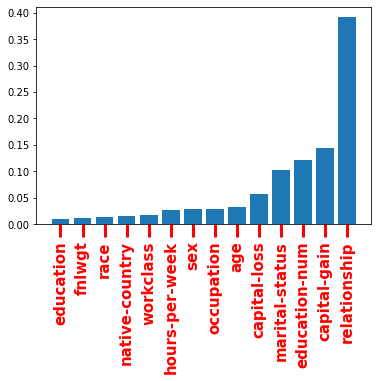

In [71]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
importance, X_cols = get_sorted(importance, X_cols_orig)

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
get_plot(importance)

# Permutation Feature Importance for Classification (long)

Feature: 0, Score: 0.00048
Feature: 1, Score: 0.00265
Feature: 2, Score: 0.00517
Feature: 3, Score: 0.00575
Feature: 4, Score: 0.01017
Feature: 5, Score: 0.01031
Feature: 6, Score: 0.01225
Feature: 7, Score: 0.01712
Feature: 8, Score: 0.03155
Feature: 9, Score: 0.03348
Feature: 10, Score: 0.03431
Feature: 11, Score: 0.06985
Feature: 12, Score: 0.07626
Feature: 13, Score: 0.07644


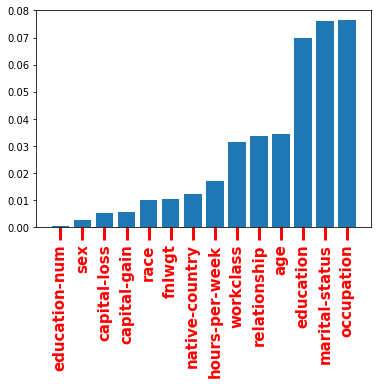

In [72]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')

# get importance
importance = results.importances_mean
importance, X_cols = get_sorted(importance, X_cols_orig)

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

get_plot(importance)

# Feature Selection with Importance (CHECK) (Change line 26)


In [37]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# define the dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear') #CHANGE
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)

print('Accuracy: %.2f' % (accuracy*100))



AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [36]:
def get_pass():
    
    pw = '1729173241:AAH-Xuwdpukn8bVu-nExWWUZsV5bw5cb360'
    chatid = '-516181344'
    
    dict_ = 'Code Passed'
    url1 = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}&disable_web_page_preview=True&parse_mode=markdown'.format(
        pw, chatid, dict_)
    resp = requests.get(url1)
get_pass()

NameError: name 'requests' is not defined

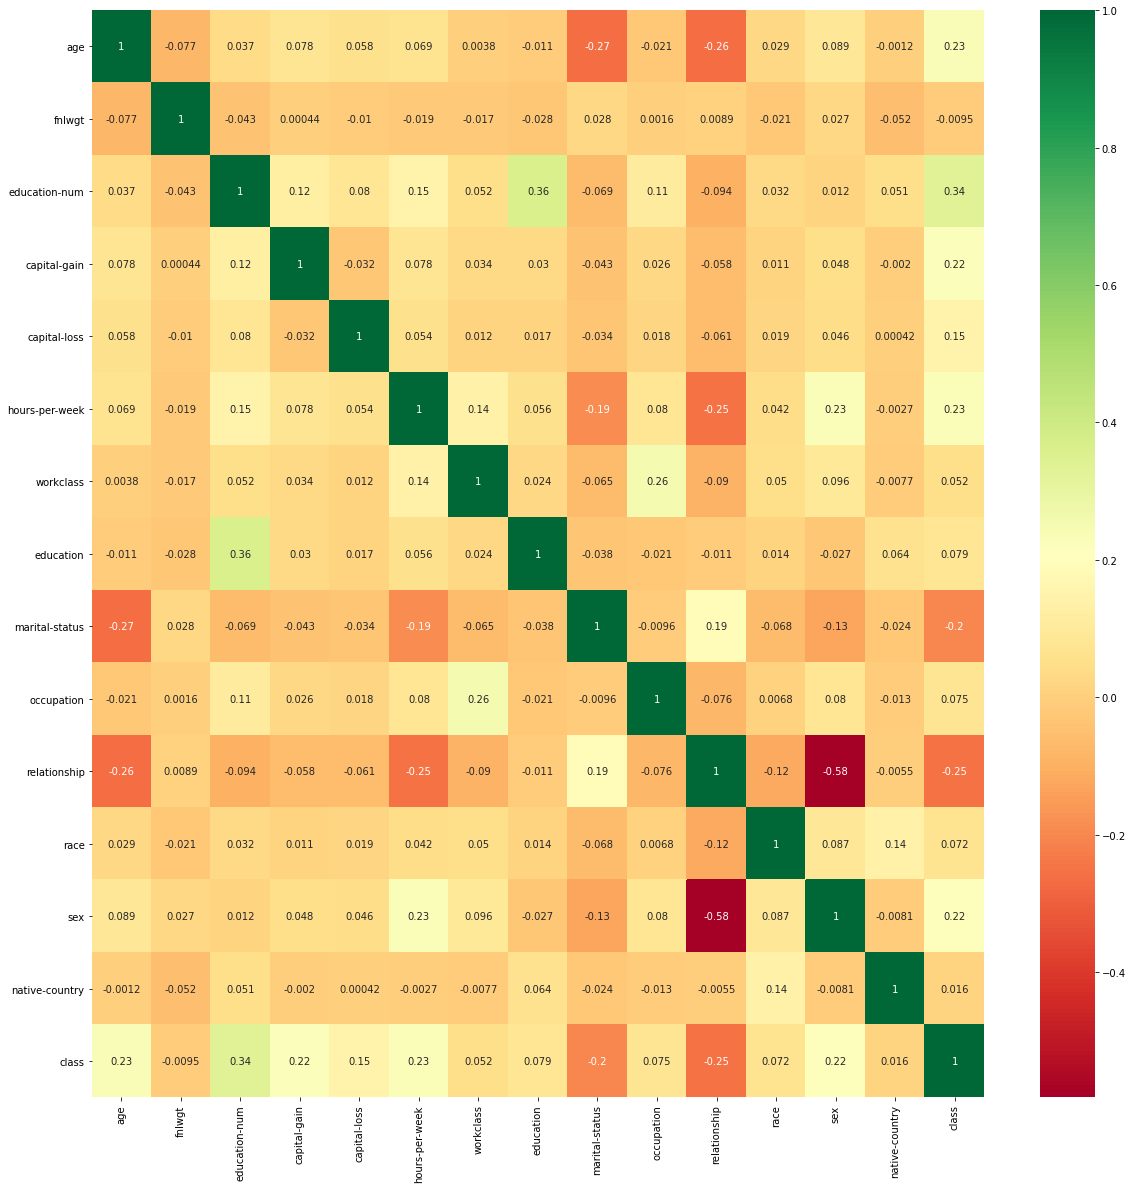

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [60]:
b

('one', 'one2', 'two', 'three', 'four')